<a href="https://colab.research.google.com/github/murilomike/Extra-o-de-Dados-via-API-com-Python/blob/main/Extra%C3%A7%C3%A3o_de_Dados_via_API_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extração de Dados via API com Python

##  Importar bibliotecas necessárias

In [14]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Configurando parâmetros da requisição

In [31]:
URL = "https://bored-api.appbrewery.com/random"
NUM_REQUESTS = 20
MAX_RETRIES = 3
TIMEOUT = 5

## Função de Requisição

In [33]:
def extrair_atividade():
    for attempt in range(MAX_RETRIES):
        try:
            response = requests.get(URL, timeout=TIMEOUT)
            response.raise_for_status()
            return response.json()
        except requests.exceptions.RequestException as e:
            print(f"Tentativa {attempt + 1}/{MAX_RETRIES} falhou: {e}")
            time.sleep(1)
    return None


## Loop de Coleta

In [34]:
atividades = []
for i in range(NUM_REQUESTS):
    print(f"Coletando atividade {i+1}/{NUM_REQUESTS}...")
    atividade = extrair_atividade()
    if atividade:
        atividades.append(atividade)


Coletando atividade 1/20...
Coletando atividade 2/20...
Coletando atividade 3/20...
Coletando atividade 4/20...
Coletando atividade 5/20...
Coletando atividade 6/20...
Coletando atividade 7/20...
Coletando atividade 8/20...
Coletando atividade 9/20...
Coletando atividade 10/20...
Coletando atividade 11/20...
Coletando atividade 12/20...
Coletando atividade 13/20...
Coletando atividade 14/20...
Coletando atividade 15/20...
Coletando atividade 16/20...
Coletando atividade 17/20...
Coletando atividade 18/20...
Coletando atividade 19/20...
Coletando atividade 20/20...


## Criação do DataFrame e Salvamento

In [35]:
df = pd.DataFrame(atividades)
colunas_relevantes = ["activity", "type", "participants", "price", "accessibility"]
df = df[colunas_relevantes]
df.columns = ["Atividade", "Tipo", "Participantes", "Preço", "Acessibilidade"]
df = df.drop_duplicates(subset=["Atividade"])
df.to_csv("atividades_bored.csv", index=False, encoding="utf-8")


In [36]:
df

,Atividade,Tipo,Participantes,Preço,Acessibilidade
0,Write a handwritten letter to somebody,social,1,0.10,Few to no challenges
1,Learn how to play a new sport,recreational,1,0.10,Minor challenges
2,Go to the library and find an interesting book,relaxation,1,0.05,Few to no challenges
3,Learn and play a new card game,recreational,1,0.00,Few to no challenges
4,Do a jigsaw puzzle,recreational,1,0.10,Few to no challenges
5,Solve a Rubik's cube,recreational,1,0.00,Few to no challenges
6,Binge watch a trending series,recreational,1,0.20,Few to no challenges
7,Go see a movie in theaters with a few friends,social,4,0.20,Minor challenges
8,Learn how to make an Alexa skill,education,1,0.00,Minor challenges
9,Learn a new programming language,education,1,0.10,Few to no challenges


## Visualização dos Dados da API

/tmp/ipython-input-2273520740.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Tipo", order=df["Tipo"].value_counts().index, palette="viridis")


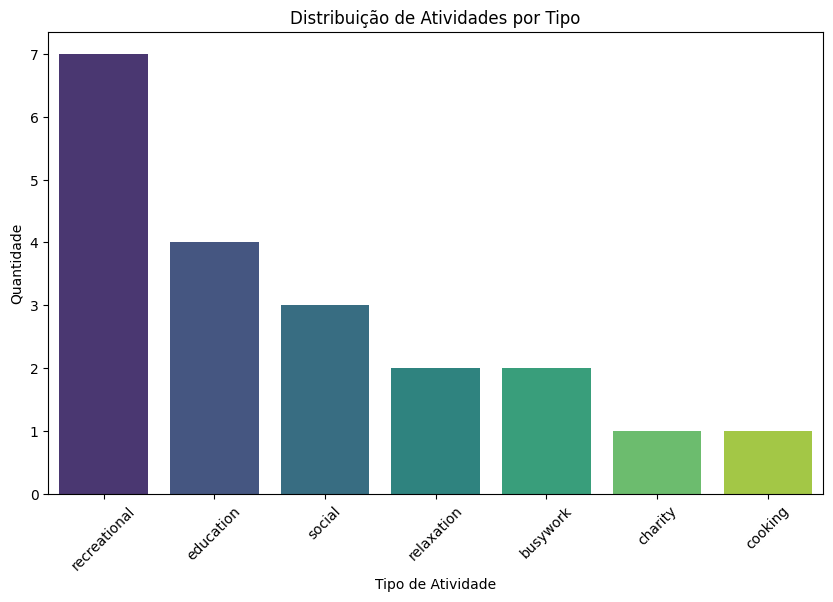

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Tipo", order=df["Tipo"].value_counts().index, palette="viridis")
plt.title("Distribuição de Atividades por Tipo")
plt.xlabel("Tipo de Atividade")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-2652014816.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Tipo", y="Preço", palette="muted")


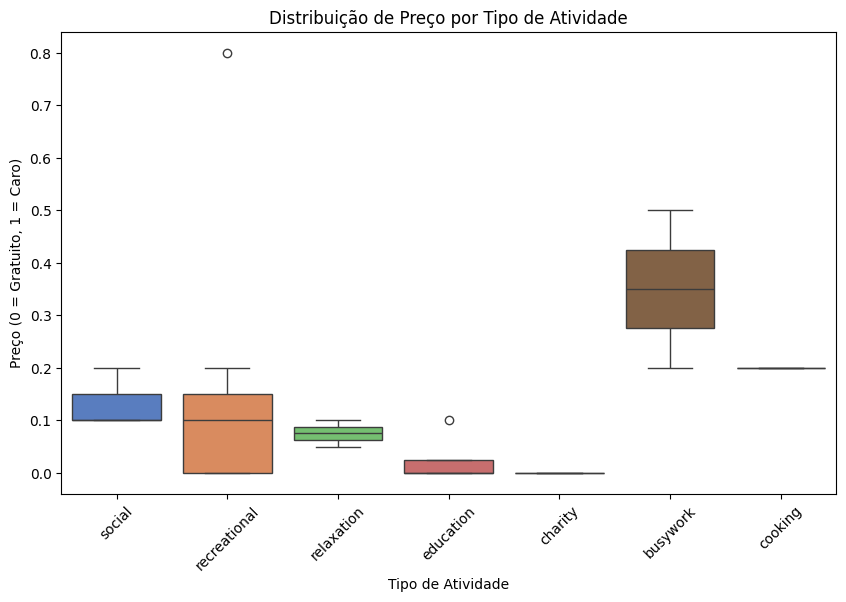

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Tipo", y="Preço", palette="muted")
plt.title("Distribuição de Preço por Tipo de Atividade")
plt.xlabel("Tipo de Atividade")
plt.ylabel("Preço (0 = Gratuito, 1 = Caro)")
plt.xticks(rotation=45)
plt.show()


# Extração de atividade específica via Chave Específica

Toda API tem regras, e na The Bored API nós podemos fazer uma requisição especificando uma chave existente dentro da API como em /activity/3943506

In [40]:
url = "https://bored-api.appbrewery.com/activity/3943506"


In [41]:
response = requests.get(url)
dados = response.json()


Os dados estão em JSON

In [42]:
print(dados)


{'activity': 'Learn Express.js', 'availability': 0.25, 'type': 'education', 'participants': 1, 'price': 0.1, 'accessibility': 'Few to no challenges', 'duration': 'hours', 'kidFriendly': True, 'link': 'https://expressjs.com/', 'key': '3943506'}


In [43]:
df = pd.DataFrame([dados])
df.columns = ["Atividade", "Disponibilidade", "Tipo", "Participantes", "Preço",
              "Acessibilidade", "Duração", "Infantil", "Link", "Chave"]


In [44]:
df.to_csv("atividade_expressjs.csv", index=False, encoding="utf-8")

Os dados da API antes em JSON agora estão convertidos para o formato de DataFrame podendo ser lido pelo Pandas como uma TABELA

In [45]:
pd.read_csv("atividade_expressjs.csv")

,Atividade,Disponibilidade,Tipo,Participantes,Preço,Acessibilidade,Duração,Infantil,Link,Chave
0,Learn Express.js,0.25,education,1,0.1,Few to no challenges,hours,True,https://expressjs.com/,3943506


# Extração de atividades filtradas por tipo

In [46]:
url_um = "https://bored-api.appbrewery.com/filter?type=education"


In [47]:
response = requests.get(url_um)
atividades = response.json()


In [48]:
for atividade in atividades:
    print(atividade["activity"])


Learn Express.js
Learn to greet someone in a new language
Learn a new programming language
Learn how to fold a paper crane
Learn about the Golden Ratio
Learn calligraphy
Learn to sew on a button
Learn how to french braid hair
Learn how to whistle with your fingers
Learn how to write in shorthand
Learn how to make a website
Learn how the internet works
Memorize the fifty states and their capitals
Take a class at your local community center that interests you
Learn origami
Read a formal research paper on an interesting subject
Learn how to make an Alexa skill
Learn Kotlin
Learn GraphQL
Start a webinar on a topic of your choice
Learn how to use an Arduino
Learn Javascript
Research a topic you're interested in
Study a foreign language
Learn the NATO phonetic alphabet
Watch a Khan Academy lecture on a subject of your choosing
Learn about a distributed version control system such as Git
Learn Morse code
Memorize a favorite quote or poem
Learn the periodic table


Transformar em DataFrame

In [49]:
df = pd.DataFrame(atividades)
df = df[["activity", "type", "participants", "price", "accessibility", "duration", "kidFriendly", "link", "key"]]
df.columns = ["Atividade", "Tipo", "Participantes", "Preço", "Acessibilidade", "Duração", "Infantil", "Link", "Chave"]


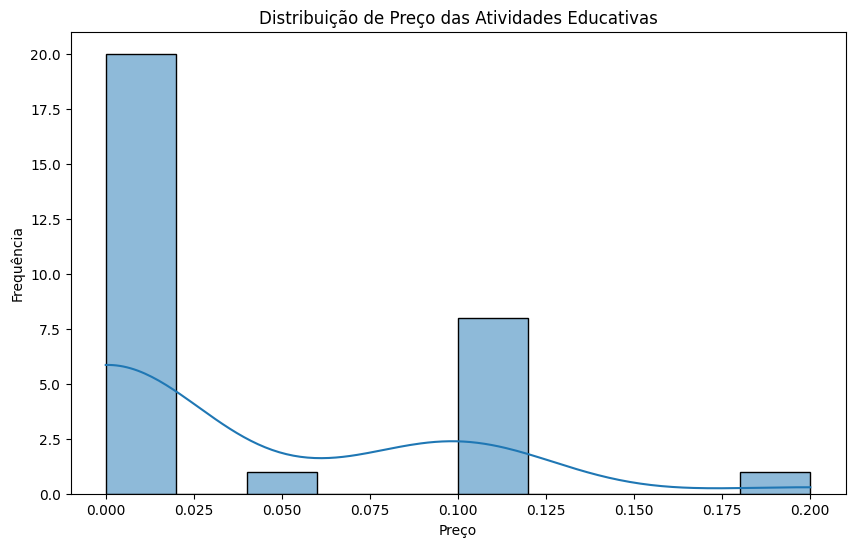

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Preço", bins=10, kde=True)
plt.title("Distribuição de Preço das Atividades Educativas")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.show()
